1.Implement a basic CNN model for age detection on the IMDB-WIKI dataset.

This is the notebook for model in age gender detector. Here, we will extract the data, train it and fit it into our model.

import The Necessary Labraries

In [3]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

### Extract data from the dataset

If data has not been downloaded yet, download from [here](https://www.kaggle.com/datasets/abhikjha/imdb-wiki-faces-dataset)

In [4]:
fldr="./imdb_crop/01"

In [5]:
import os
flies=os.listdir(fldr)

In [6]:
ages=[]
genders=[]
images=[]

for fle in flies:
    age=(fle.split('_')[0])
    gender=(fle.split('_')[1])
    total=fldr+'/'+fle
    print(total)
    image=cv2.imread(total)

    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)

./imdb_crop/01/nm0000001_rm124825600_1899-5-10_1968.jpg
./imdb_crop/01/nm0000001_rm3343756032_1899-5-10_1970.jpg
./imdb_crop/01/nm0000001_rm577153792_1899-5-10_1968.jpg
./imdb_crop/01/nm0000001_rm946909184_1899-5-10_1968.jpg
./imdb_crop/01/nm0000001_rm980463616_1899-5-10_1968.jpg
./imdb_crop/01/nm0000101_rm100243712_1952-7-1_1997.jpg
./imdb_crop/01/nm0000101_rm1028037120_1952-7-1_1995.jpg
./imdb_crop/01/nm0000101_rm1196283136_1952-7-1_1984.jpg
./imdb_crop/01/nm0000101_rm119982848_1952-7-1_1989.jpg
./imdb_crop/01/nm0000101_rm1252392448_1952-7-1_1987.jpg
./imdb_crop/01/nm0000101_rm1283956736_1952-7-1_1975.jpg
./imdb_crop/01/nm0000101_rm1317511168_1952-7-1_1975.jpg
./imdb_crop/01/nm0000101_rm1330500864_1952-7-1_1984.jpg
./imdb_crop/01/nm0000101_rm1334288384_1952-7-1_1975.jpg
./imdb_crop/01/nm0000101_rm1352584704_1952-7-1_1983.jpg
./imdb_crop/01/nm0000101_rm141072896_1952-7-1_2001.jpg
./imdb_crop/01/nm0000101_rm1412864512_1952-7-1_2006.jpg
./imdb_crop/01/nm0000101_rm1451728896_1952-7-1_197

#### Create List of Age and Gender from the dataset 

In [7]:
for fle in flies:
    age=(fle.split('_')[0])
    gender=(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

Saving images array, ages array, and genders array in the system

In [8]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

Viewing a Sample

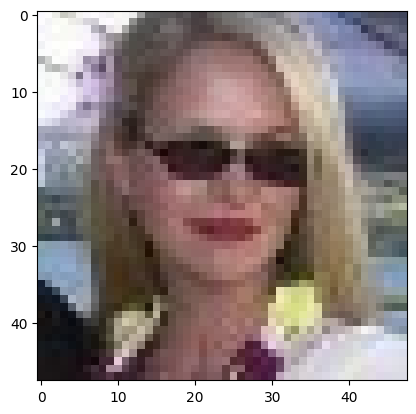

In [52]:
plt.imshow(images[101])

In [53]:
print(ages[101])


nm0000101


In [47]:
print(genders[101])


rm4126251776


In [12]:
values, counts=np.unique(genders_f, return_counts='True')
print(counts)

[1 1 1 ... 1 1 1]


Plotting the No. of Male and Female Samples

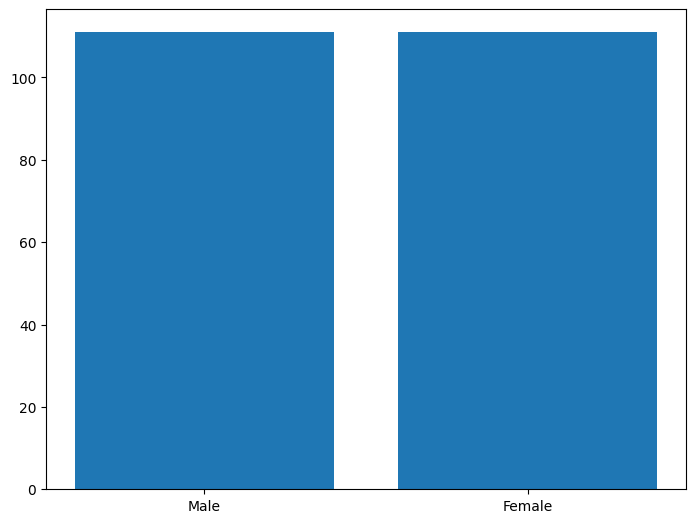

In [13]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[111,111]
ax.bar(gender,values)
plt.show()

Finding a no. of Male and Female sampales respectively

In [14]:
values, counts=np.unique(ages_f, return_counts='True')
print(counts)

[  5 127 310 116 358 193  38 362  15  29 157 229  97  35 795   6  44  67
   3   1  11   4  28  11  68   7  21  11  39  21   1   1   3   3   3   1
  19   1   1  19   2   6   2   2   2   1 226  11   6   2   7   2   1   2
   2   2   6   3  12  45   4   1  80 131  10   6 129   5 153   5   9   2
   1  18   1   1   5   6   5   3   3   3  35   1   1   2   7  11   8   2
   1   3   1   2   3   4   1   1  27   4   1   1  11   6   2   3   4   3
   1   1  43   1 159   1   1  30   3   1   1  10   4   4  15   5   8   9
   4   6   2   3   1   7   2   6   3   1   4   1   2   2   5   7   1   1
   2   1  11   2   1   1   1   4   2   6   4   1  20 172   1   7   7  16
   3   5   1  37   2   3   1   3   6   5   1  12   1   2   1  28   6  65
   6   1   1   1   1   1   3   5   3  10   2   1  18   2   2  73   3   6
   6  12   8   1   6   8   3  10   7   1   6   1   4  48   7   1   2  97
   1  11   4   9  13   9   2   7]


In [15]:
va=values.tolist()
cnt=counts.tolist()

## Plotting The samples Agewise

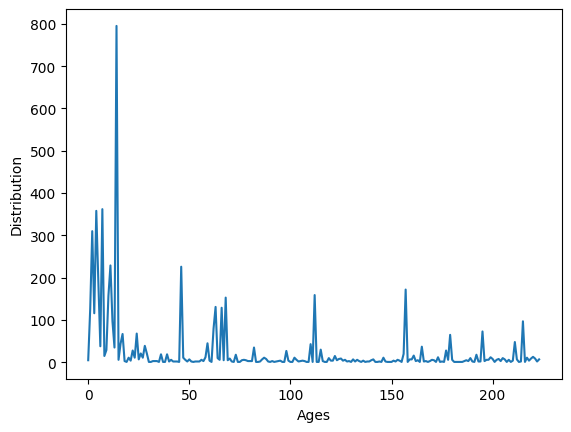

In [16]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

In [17]:

len(gender)

2

### Defining labels for output

In [18]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1


Create another list of images from existing one

In [19]:
images_f_2=images_f/255

In [20]:
images_f_2.shape

(5547, 48, 48, 3)

In [21]:
labels_f=np.array(labels)

In [34]:
from sklearn.model_selection import train_test_split

### Splitting the Dataset into test and train

In [35]:
X_train,X_test,Y_train,Y_test=train_test_split(images_f_2,labels_f,test_size=0.25)
Y_train[0:5]

array([['nm0336701', 'rm1458284544'],
       ['nm0000701', 'rm231774464'],
       ['nm0000201', 'rm3580221696'],
       ['nm0336701', 'rm2681844992'],
       ['nm1107001', 'rm1390974976']], dtype='<U12')

### Splitting 'Y_test' and 'Y_train' further
#### For better understanding

In [36]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [37]:
Y_train_2[0][0:5]

array(['rm1458284544', 'rm231774464', 'rm3580221696', 'rm2681844992',
       'rm1390974976'], dtype='<U12')

In [38]:
Y_train_2[1][0:5]

array(['nm0336701', 'nm0000701', 'nm0000201', 'nm0336701', 'nm1107001'],
      dtype='<U12')

## Defining the Model

In [39]:
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3), padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x 

In [40]:
def model(input_shape):
    inputs = Input((input_shape))
    conv_1 = Convolution(inputs, 32)
    maxp_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
    conv_2 = Convolution(maxp_1, 64)
    maxp_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
    conv_3 = Convolution(maxp_2, 128)
    maxp_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
    conv_4 = Convolution(maxp_3, 256)
    maxp_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)
    flatten = Flatten()(maxp_4)
    dense_1 = Dense(64, activation='relu')(flatten)
    dense_2 = Dense(64, activation='relu')(flatten)
    drop_1 = Dropout(0.2)(dense_1)
    drop_2 = Dropout(0.2)(dense_2)
    output_1 = Dense(1, activation='sigmoid', name='sex_out')(drop_1)
    output_2 = Dense(1, activation='relu', name='age_out')(drop_2)
    model = Model(inputs=inputs, outputs=[output_1, output_2])
    model.compile(loss=["binary_crossentropy", "mae"], optimizer="Adam", metrics=[["accuracy"],["accuracy"]])
    return model

In [41]:
model=model((48,48,3))

In [42]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 48, 48,    │        896 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 48, 48,    │          0 │ conv2d_4[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 48, 48,    │          0 │ dropout_6[0][0]   │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 24, 24,    │          0 │ activation_4[0][… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 24, 24,    │     18,496 │ max_pooling2d_4[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 24, 24,    │          0 │ conv2d_5[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_5        │ (None, 24, 24,    │          0 │ dropout_7[0][0]   │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 12, 12,    │          0 │ activation_5[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 12, 12,    │     73,856 │ max_pooling2d_5[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 12, 12,    │          0 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_6        │ (None, 12, 12,    │          0 │ dropout_8[0][0]   │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 6, 6, 128) │          0 │ activation_6[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 6, 6, 256) │    295,168 │ max_pooling2d_6[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 6, 6, 256) │          0 │ conv2d_7[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_7        │ (None, 6, 6, 256) │          0 │ dropout_9[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 3, 3, 256) │          0 │ activation_7[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 683,586 (2.61 MB)

 Trainable params: 683,586 (2.61 MB)

 Non-trainable params: 0 (0.00 B)